In [39]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML
from tensorflow.keras import layers

In [40]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "C:/Users/Saarathy Mithran/Downloads/DATASETS (SA3)/s/Pepper",
    seed=123,
    shuffle=True,
    image_size=(256,256),
    batch_size=32
)

Found 2475 files belonging to 2 classes.


In [41]:
class_names = dataset.class_names
class_names

['Bacterial_spot', 'Healthy']

In [42]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())

(32, 256, 256, 3)
[1 1 0 1 0 0 0 1 0 1 1 0 0 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1]


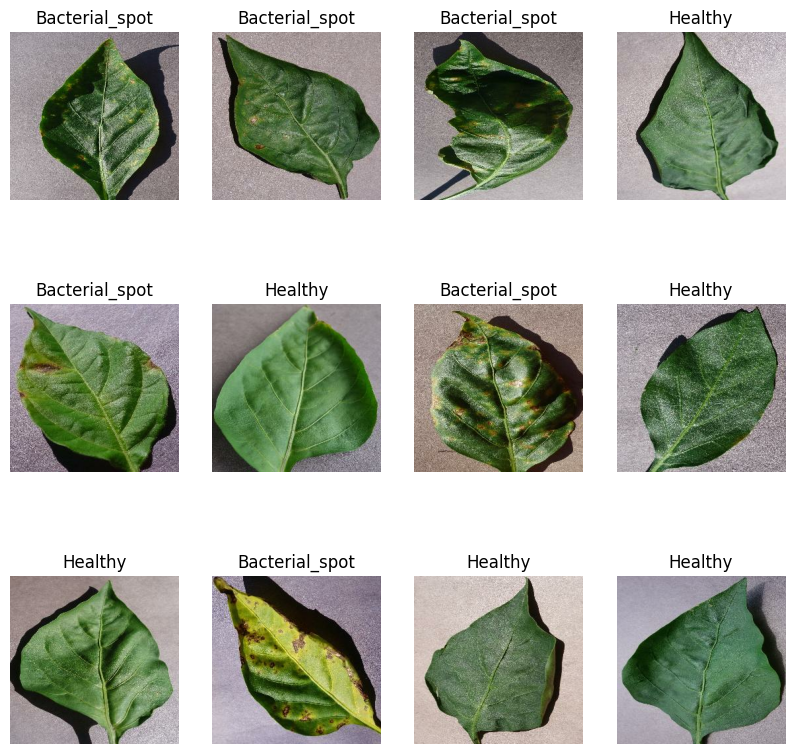

In [43]:
plt.figure(figsize=(10, 10))
for image_batch, labels_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

In [44]:
train_size = 0.8
len(dataset)*train_size

62.400000000000006

In [45]:
train_ds = dataset.take(54)
len(train_ds)

54

In [46]:
test_ds = dataset.skip(54)
len(test_ds)

24

In [47]:
val_size=0.1
len(dataset)*val_size

7.800000000000001

In [48]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [49]:
test_ds = test_ds.skip(6)
len(test_ds)

18

In [50]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [51]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [52]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

BUILDING THE MODEL

In [53]:
resize_and_rescale = tf.keras.Sequential([
  layers.Resizing(256, 256),
  layers.Rescaling(1./255),
])

In [54]:
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])

In [55]:
train_ds = train_ds.map(
    lambda x, y: (data_augmentation(x, training=True), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)

In [56]:
input_shape = (256, 256, 3)
n_classes = 10

model = models.Sequential([
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=(None, *input_shape))



In [57]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)              │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 60, 60, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 12, 12, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 184,202 (719.54 KB)

 Trainable params: 184,202 (719.54 KB)

 Non-trainable params: 0 (0.00 B)

In [58]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [59]:
history = model.fit(
    train_ds,
    batch_size=32,
    validation_data=val_ds,
    verbose=1,
    epochs=50,
)

Epoch 1/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 216s 3s/step - accuracy: 0.6672 - loss: 1.9441 - val_accuracy: 0.8839 - val_loss: 0.3865
Epoch 2/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 177s 3s/step - accuracy: 0.8944 - loss: 0.2757 - val_accuracy: 0.9241 - val_loss: 0.3206
Epoch 3/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 165s 3s/step - accuracy: 0.9155 - loss: 0.2600 - val_accuracy: 0.9062 - val_loss: 0.3512
Epoch 4/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 145s 2s/step - accuracy: 0.9498 - loss: 0.1752 - val_accuracy: 0.9554 - val_loss: 0.5912
Epoch 5/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 152s 2s/step - accuracy: 0.9850 - loss: 0.0821 - val_accuracy: 0.9955 - val_loss: 0.1947
Epoch 6/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 154s 2s/step - accuracy: 0.9766 - loss: 0.0923 - val_accuracy: 0.9911 - val_loss: 0.1712
Epoch 7/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 142s 2s/step - accuracy: 0.9900 - loss: 0.0641 - val_accuracy: 0.9955 - val_loss: 0.2952
Epoch 8/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 135s 2s/step - accuracy: 0.9949 - loss: 0.0406 - val_accuracy: 0.9911 - v

In [60]:
scores = model.evaluate(test_ds)
scores

9/9 ━━━━━━━━━━━━━━━━━━━━ 12s 473ms/step - accuracy: 0.9698 - loss: 0.0852


[0.08306858688592911, 0.9722222089767456]

In [61]:
history

In [62]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 62}

In [63]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [64]:
type(history.history['loss'])

list

In [65]:
history.history['loss'][:5]

[0.8274370431900024,
 0.24710135161876678,
 0.24404586851596832,
 0.15727823972702026,
 0.08893200010061264]

In [66]:

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

In [67]:
loss = history.history['loss']
val_loss = history.history['val_loss']

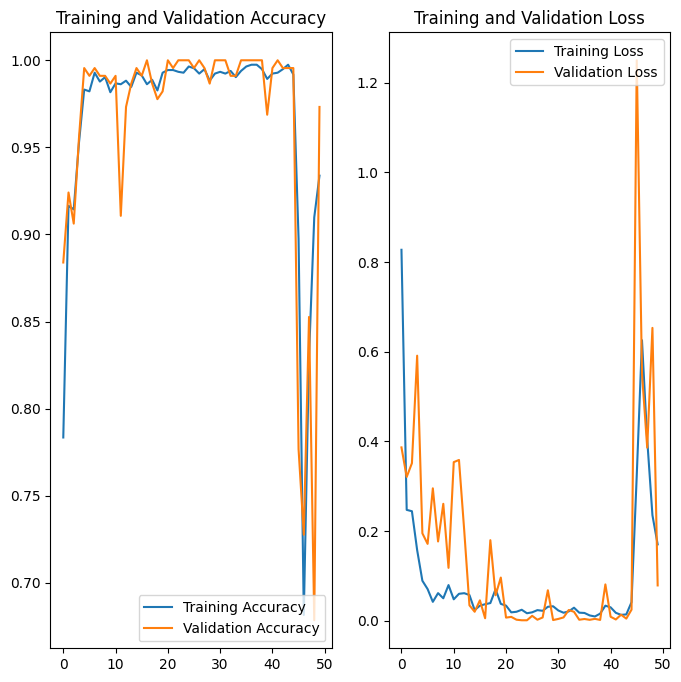

In [68]:
epochs = len(acc) 
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(epochs), acc, label='Training Accuracy')
plt.plot(range(epochs), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')


plt.subplot(1, 2, 2)
plt.plot(range(epochs), loss, label='Training Loss')
plt.plot(range(epochs), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: Healthy
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
predicted label: Healthy


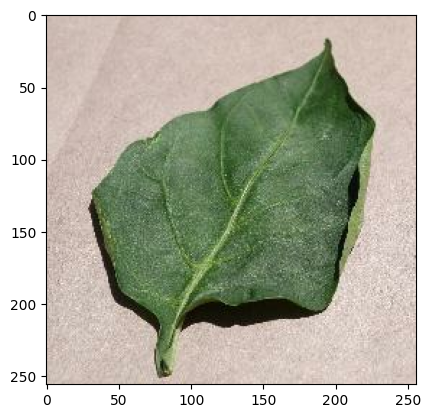

In [69]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [70]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 923ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step


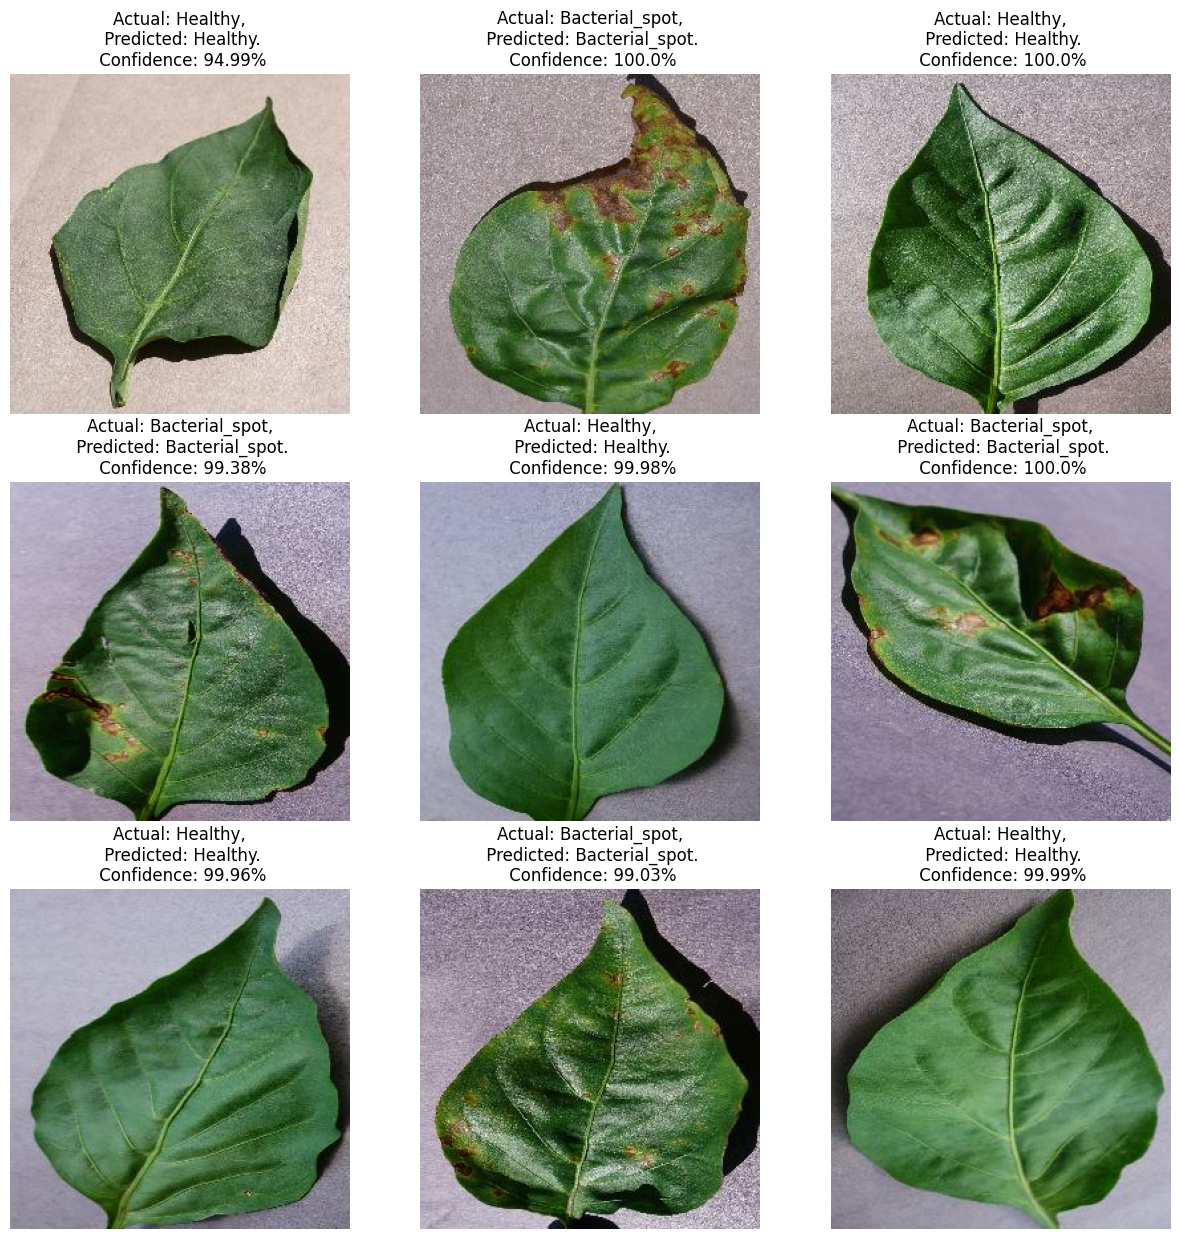

In [71]:

plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [72]:
import os

models_dir = "C:/Users/Saarathy Mithran/Downloads/DATASETS (SA3)/s/models"

os.makedirs(models_dir, exist_ok=True)

model_version = max([int(i) for i in os.listdir(models_dir) if i.isdigit()] + [0]) + 1

save_dir = f"C:/Users/Saarathy Mithran/Downloads/DATASETS (SA3)/s/{model_version}/"
os.makedirs(save_dir, exist_ok=True)

model.save(os.path.join(save_dir, "model.keras"))


In [73]:
model.save(os.path.join(save_dir, "pepper.h5"))

: 